# Aula 1 - Classificação: o que é e como funciona?

## 1.1 - Apresentação


## 1.2 - Importando os dados

In [8]:
import pandas as pd

In [9]:
dados = pd.read_csv('/content/Customer-Churn.csv')

In [10]:
dados.shape

(7043, 18)

In [11]:
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


## 1.3 - Diferentes Variáveis

In [12]:
#modificação de forma manual 
traducao_dic = {'Sim': 1, 
                'Nao': 0}

dadosmodificados = dados[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(traducao_dic)
dadosmodificados.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [13]:
#transformação pelo get_dummies
dummie_dados = pd.get_dummies(dados.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'],
                axis=1))

#junção dos dados trasformados com os que já tinhamos
dados_final = pd.concat([dadosmodificados, dummie_dados], axis=1)

In [14]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,...,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,...,1,0,0,0,1,0,0,1,0,0


## 1.4 - Definição Informal

(slides)

## 1.5 - Definição Formal

Informações para classificação:

$X$ = inputs (dados de entrada)

$y$ = outputs (dados de saída)

In [15]:
#DICA
pd.set_option('display.max_columns', 39)

In [16]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0



$y_i$ = $f(x_i)$

In [17]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]

In [18]:
#ymaria = ?

Novos pares de informações = ($Xmaria$, $ymaria$)

## Balanceamento dos dados

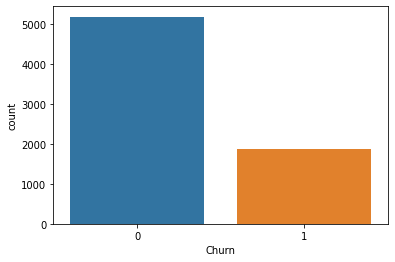

In [19]:
#variável target está desbalanceada
import seaborn as sns
%matplotlib inline
ax = sns.countplot(x='Churn', data=dados_final)

In [20]:
dados_final.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [21]:
#biblioteca para balancear os dados utilizando over_sampling
from imblearn.over_sampling import SMOTE

In [22]:
#dividindo os dados em caracteristicas e target
X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [23]:
smt = SMOTE(random_state=123)
X, y = smt.fit_resample(X, y)

In [24]:
#junção dos dados balanceados
dados_final = pd.concat([X, y], axis=1)

In [25]:
#verificação 1 - junção dos dados
dados_final.head(2)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0


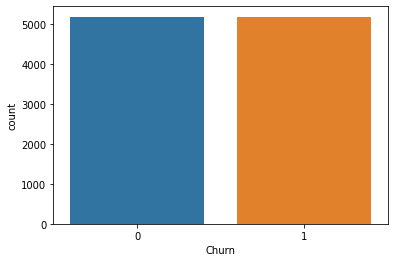

In [26]:
#verificação 2 - balanceamento
ax = sns.countplot(x='Churn', data=dados_final)

In [27]:
dados_final.Churn.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [28]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=eaf691f62eefa9e07eee1fecc9202cca6f3474dea7cdef2155ef5c944f4c2b0f
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


In [29]:
from sklearn.preprocessing import StandardScaler 

In [30]:
#Divisão dos dados em inputs e outputs
x= dados_final.drop('Churn',axis=1)
y= dados_final['Churn']

In [31]:
norm =  StandardScaler()

X_normalizado = norm.fit_transform(x)
X_normalizado

array([[ 1.26542767, -0.52756038, -3.06083934, ...,  1.30292044,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
         2.08580171, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
         2.08580171, -0.43617215],
       ...,
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30292044,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
        -0.47943196, -0.43617215]])

In [32]:
X_normalizado[0]

array([ 1.26542767, -0.52756038, -3.06083934,  0.8149851 , -0.41334384,
       -1.10768354, -1.32176205, -0.88482108,  3.18604176, -0.83366906,
        1.51268338, -1.04386816, -0.44617598,  0.868102  , -0.44617598,
       -0.5173695 , -0.95871762, -0.44617598,  1.57389661,  1.04326198,
       -0.44617598, -0.64211419,  0.87997069, -0.44617598, -0.52426638,
        1.18643645, -0.44617598, -0.77707385,  1.2033586 , -0.44617598,
       -0.78992399, -0.44648735,  0.73773107, -0.41989297, -0.42576817,
        1.30292044, -0.47943196, -0.43617215])

In [33]:
Xmaria_normalizado = norm.transform(pd.DataFrame(Xmaria, columns = X.columns))
Xmaria_normalizado

array([[-0.79024667, -0.52756038,  0.32670777,  0.8149851 , -0.41334384,
        -1.14934709, -0.97235471,  1.13017199, -0.31386908, -0.83366906,
        -0.66107688,  0.95797538, -0.44617598,  0.868102  , -0.44617598,
        -0.5173695 , -0.95871762, -0.44617598,  1.57389661,  1.04326198,
         2.24126814, -0.64211419, -1.13640148,  2.24126814, -0.52426638,
         1.18643645, -0.44617598, -0.77707385, -0.83100748, -0.44617598,
         1.26594459, -0.44648735, -1.35550751,  2.38155929, -0.42576817,
        -0.76750657, -0.47943196,  2.29267273]])

Vamos aplicar, como exemplo, a distancia euclidiana da maria ao cliente 0 (X[0]).

In [34]:
import numpy as np

In [35]:
a= Xmaria_normalizado
b = X_normalizado[0]

np.square(a-b)

array([[4.22579699e+00, 0.00000000e+00, 1.14754754e+01, 0.00000000e+00,
        0.00000000e+00, 1.73585140e-03, 1.22085486e-01, 4.06019707e+00,
        1.22493759e+01, 0.00000000e+00, 4.72523363e+00, 4.00737757e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        7.22235589e+00, 0.00000000e+00, 4.06575675e+00, 7.22235589e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.13864535e+00, 0.00000000e+00, 4.22659561e+00, 0.00000000e+00,
        4.38164773e+00, 7.84813473e+00, 0.00000000e+00, 4.28666801e+00,
        0.00000000e+00, 7.44659439e+00]])

In [36]:
np.sum(np.square(a-b))

91.70603225977928

In [37]:
np.sqrt(np.sum(np.square(a-b)))

9.576326657950807

##KNN

Implementando o Modelo:

Biblioteca para divisão dos dados:

In [38]:
from sklearn.model_selection import train_test_split

X_treino,X_teste,Y_treino,Y_teste = train_test_split(X_normalizado, y, test_size =0.3,random_state = 123)


Treino e Teste:

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn= KNeighborsClassifier(metric='euclidean')

In [41]:
#treino o modelo com dados de treino
knn.fit(X_treino, Y_treino)

KNeighborsClassifier(metric='euclidean')

In [42]:
#Treinando o modelo com dados de teste
predito_knn = knn.predict(X_teste)

Vamos ver como foi nossa previsão:

In [43]:
predito_knn

array([1, 0, 0, ..., 0, 1, 1])

##Modelo Probabilistico

In [44]:
np.median(X_treino)

-0.4461759755508453

In [45]:
from sklearn.naive_bayes import BernoulliNB 

In [47]:
bnb =  BernoulliNB(binarize = -0.44)

In [48]:
bnb.fit(X_treino,Y_treino)

BernoulliNB(binarize=-0.44)

In [49]:
predito_BNB=bnb.predict(X_teste)

In [50]:
predito_BNB

array([1, 0, 0, ..., 1, 1, 1])

##Árvore de Decisão:

Implementando o modelo:



In [51]:
from sklearn.tree import DecisionTreeClassifier

Instanciando o modelo:

In [53]:
dtc =  DecisionTreeClassifier(criterion = 'entropy', random_state = 42)

Treinando o modelo:

In [54]:
dtc.fit(X_treino,Y_treino)

DecisionTreeClassifier(criterion='entropy', random_state=42)

Verificando a importância de cada atributo:

In [55]:
dtc.feature_importances_

array([0.02100894, 0.01395648, 0.0068095 , 0.01987306, 0.01892071,
       0.16274644, 0.22207834, 0.00929414, 0.00344576, 0.01033768,
       0.0019815 , 0.03131262, 0.00065123, 0.00849934, 0.        ,
       0.01698366, 0.00622973, 0.        , 0.00964718, 0.01267467,
       0.00027769, 0.00770208, 0.01306512, 0.00368329, 0.02048744,
       0.00371587, 0.        , 0.00156955, 0.00671244, 0.0003825 ,
       0.01126638, 0.03611651, 0.16384005, 0.07422263, 0.01760111,
       0.02127213, 0.02182911, 0.01980513])

In [56]:
predito_ArvoreDecisao =  dtc.predict(X_teste)

In [57]:
predito_ArvoreDecisao

array([0, 0, 0, ..., 1, 1, 1])

##Escolhendo o Melhor Modelo:

###Calculando a matriz de confusão:

In [60]:
 from sklearn.metrics import confusion_matrix

In [61]:
print(confusion_matrix(Y_teste,predito_knn))

[[1241  328]
 [ 247 1289]]


In [62]:
print(confusion_matrix(Y_teste,predito_BNB))

[[1050  519]
 [ 242 1294]]


In [63]:
print(confusion_matrix(Y_teste,predito_ArvoreDecisao))

[[1249  320]
 [ 277 1259]]


###Calculando a acurácia

In [64]:
from sklearn.metrics import accuracy_score

Modelo KNN:

In [65]:
print(accuracy_score(Y_teste,predito_knn))

0.8148148148148148


Modelo Bernoulli Nayve-Bayes

In [67]:
print(accuracy_score(Y_teste,predito_BNB))

0.7549114331723027


Modelo Árvore de Decisão

In [68]:
print(accuracy_score(Y_teste, predito_ArvoreDecisao))

0.8077294685990338


Pela Acurácia o KNN é o melhor!

###Calculando a Precisão:

In [69]:
from sklearn.metrics import precision_score

Modelo KNN:

In [71]:
print(precision_score(Y_teste,predito_knn))

0.7971552257266543


Modelo Berboulli de Naiva Bayes:

In [72]:
print(precision_score(Y_teste,predito_BNB))

0.7137341423055709


Modelo da Árvore de Decisão:

In [73]:
print(precision_score(Y_teste,predito_ArvoreDecisao))

0.7973400886637112


Pela precisão o melhor algoritmo a Árvore de Decisão!

###Calculando o Recall

In [74]:
from sklearn.metrics import recall_score

###Calculando o do KNN:

In [75]:
print(recall_score(Y_teste,predito_knn))

0.8391927083333334


Calculando o do Bernoulli Naive Bayes:

In [76]:
print(recall_score(Y_teste,predito_BNB))

0.8424479166666666


Calculando o da Árvore de Decisão:

In [77]:
print(recall_score(Y_teste,predito_ArvoreDecisao))

0.8196614583333334


Pelo Recall o melhor modelo seria o Bernoulli Naive-Bayes

###Escolhendo o Melhor Modelo

A professora escolheu melhor escolher visando a precisão, porém eu creio que seja melhor o Recall

Pela precisão o melhor modelo seria a Árvore de Decisão,pelo Recall seria o Bernoulli Naive-Bayes!